## Chapter 6 - Inferring a Binomial Probability via Exact Mathematical Analysis

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from scipy.special import beta as beta_func

plt.style.use('seaborn-white')
color = '#87ceeb'

### Set up
Here, we create a vector of values that theta can take on.  This vector is **for plotting only**.  We are calculating exact solutions here, so we will have priors, likelihoods, and posteriors for essentially all of the infinite number of number of values that theta can take on. 

In [10]:
n_theta_vals = 1001

theta = np.linspace(0, 1, n_theta_vals)

### Prior
We will use a beta distribution to describe our prior beliefs about the values of $\theta$.  The use of a beta distribution to represent our prior belief about theta is critical here, because the beta distribution is the conjugate prior probability distribution for the Bernoulli likelihood that we used in chapter 5 and will reuse below.

In addition, the beta distribution is flexible enough to permit several different patterns including:

- $\alpha=1, \beta=1$ yields a uniform prior
- $\alpha=3, \beta=3$ yields a prior peaked at $\theta=0.5$ (a bit like the truncated normal we used in chapter 5)

In [11]:
a = 3
b = 3

p_theta = beta.pdf(theta, a, b)

### Data
This constructs a set of flip outcomes.  Specify the number of heads (i.e., `n_heads`) and the number of tails (i.e., `n_tails`).  There are three scenarios prepared:

1. 1 flip that comes up heads
2. 4 flips, 1 of which comes up heads (25% heads)
3. 40 flips, 10 of which come up heads (25% heads)

In [12]:
# example 1
n_heads = 1
n_tails = 0

# example 2
#n_heads = 1
#n_tails = 3

# example 3
#n_heads = 10
#n_tails = 30

data = np.repeat([1, 0], [n_heads, n_tails])

### Likelihood
Note that we are using the vector of theta values here this is because we want to plot the likelihood function below we **do not** need these lines of code in order to arrive at the posterior (as we will see).

In [13]:
# Compute the likelihood of the data:
p_data_given_theta = theta**n_heads * (1-theta)**(n_tails)

# calculate the evidence (P(D), the prior probability of the data)
p_data = beta_func(n_heads + a, n_tails + b)/beta_func(a, b)

### Inference
Here is the magic of using priors that are conjugate with our likelihood.  Because we are using a beta prior, we can straightforwardly determine the posterior by adding the number of heads/tails to the $\alpha$ and $\beta$ parameters we used to construct our prior.

In [14]:
post_a = n_heads + a
post_b = n_tails + b

# Compute the posterior for our values of theta for later visualization
p_theta_given_data = beta.pdf(theta, post_a, post_b)

### Visualize
Plot the prior, the likelihood, and the posterior.

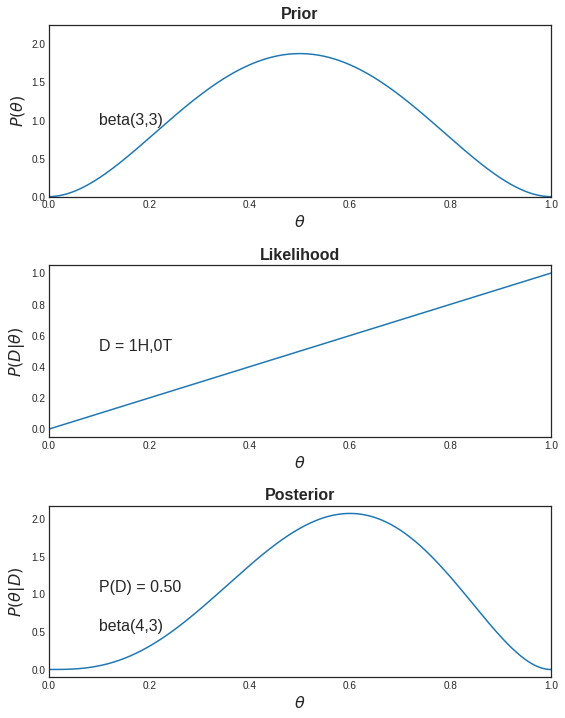

In [15]:
fig = plt.figure(figsize=(9, 12))
fig.tight_layout()
plt.subplots_adjust(hspace = .4)

# Plot the prior, the likelihood, and the posterior:
for i,dist in enumerate([p_theta, p_data_given_theta, p_theta_given_data]):
    plt.subplot(3, 1, i+1)
    plt.plot(theta, dist)
    plt.xlim(0, 1)
    plt.xlabel('$\\theta$', size=16)

# horizontal location of text labels
locx = 0.1

# prior
plt.axes(fig.axes[0])
plt.title('Prior', weight='bold', size=16)
plt.xlim(0, 1)
plt.ylim(0, np.max(p_theta)*1.2)
plt.ylabel(r'$P(\theta)$', size=16)
plt.text(locx, np.max(p_theta)/2, r'beta(%s,%s)' % (a, b), size=16)

# likelihood
plt.axes(fig.axes[1])
plt.title('Likelihood', weight='bold', size=16)
plt.ylabel('$P(D|\\theta)$', size=16)
plt.text(locx, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails), size=16)

# posterior
plt.axes(fig.axes[2])
plt.title('Posterior', weight='bold', size=16)
plt.ylabel('$P(\\theta|D)$', size=16)
locy = np.linspace(0, np.max(p_theta_given_data), 5)
plt.text(locx, locy[1], r'beta(%s,%s)' % (post_a, post_b), size=16)
plt.text(locx, locy[2], 'P(D) = %.2f' % p_data, size=16);